### <center>Homework 3</center>
Youyu Zhang

### Problem (1) 
Create a custom linear regression model using the house pricing dataset(houseprices.csv) (20 points)

 a) Split the dataset into training and test dataset 80:20

 b) Custom linear regression model should be in python class format (Should have init(), predict(), train() methods) and train the model using training dataset

 c) Predict the house prices using test dataset

 d) Show the predicted output, and loss function output plots

 e) Calculate the RMSE and R2 metrics

Note: Do not use any libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [25]:
# (a) Split dataset
df = pd.read_csv('houseprices.csv')
df1, df2 = np.split(df,[int(0.8*len(df))])

print(f"Original dataset length = {len(df)}")
print(f"Separated dataset lengths are"
      f"{len(df1)} and {len(df2)}")

def datacleaning(df):
    """
    This data cleaning method is going to convert categorical
    data into numerical values. 
    """
    # drop rows with null values
    df_clean = df.dropna(axis=0)
    # separate target values and predictor variables
    y = df_clean['Price']
    # Remove price from training dataset
    # Remove non-relative column "Home"
    x = df_clean.drop(columns=['Price','Home'], axis=1)
    # Convert categorical values into numerical ones
    x['Brick'] = np.where(x['Brick']=='No', 0, x['Brick'])
    x['Brick'] = np.where(x['Brick']=='Yes', 1, x['Brick'])
    x['Neighborhood'] = np.where(x['Neighborhood']=='East', 0, x['Neighborhood'])
    x['Neighborhood'] = np.where(x['Neighborhood']=='North', 1, x['Neighborhood'])
    x['Neighborhood'] = np.where(x['Neighborhood']=='West', 2, x['Neighborhood'])
    # Scaling
    x = (x-x.mean())/np.std(x)
    return x, y

# Split train dataset x and y, test dataset x_test and y_test
x_all,y_all = datacleaning(df)
x, x_test = np.split(x_all,[int(0.8*len(x_all))])
y, y_test = np.split(y_all,[int(0.8*len(y_all))])

df.head()

Original dataset length = 128
Separated dataset lengths are102 and 26


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [26]:
# (b) Custom linear regression model
class LinearRegression():
    """
    This class is used for multivariate linear regression.
    Input dataset should be houseprice ONLY.
    """
    def __init__(self, dataset:pd.DataFrame):
        self.df = dataset

    def datacleaning(self):
        """
        This data cleaning method is going to convert categorical
        data into numerical values. 
        """
        # drop rows with null values
        df_clean = self.df.dropna(axis=0)
        # separate target values and predictor variables
        y = df_clean['Price']
        # Remove price from training dataset
        # Remove non-relative column "Home"
        x = df_clean.drop(columns=['Price','Home'], axis=1)
        # Convert categorical values into numerical ones
        x['Brick'] = np.where(x['Brick']=='No', 0, x['Brick'])
        x['Brick'] = np.where(x['Brick']=='Yes', 1, x['Brick'])
        x['Neighborhood'] = np.where(x['Neighborhood']=='East', 0, x['Neighborhood'])
        x['Neighborhood'] = np.where(x['Neighborhood']=='North', 1, x['Neighborhood'])
        x['Neighborhood'] = np.where(x['Neighborhood']=='West', 2, x['Neighborhood'])
        # Scaling
        x = (x-x.mean())/np.std(x)
        return x, y

    def datacleaning2(self):
        """
        This is another way to finish data preprocessing.
        It will completely drop any non-numerical values.
        """
        # drop rows with null values
        df_clean = self.df.dropna(axis=0)
        # separate target values and predictor variables
        y = df_clean['Price']
        # Remove price from training dataset
        # Remove non-relative column "Home"
        x = df_clean.drop(columns=['Price','Home','Brick','Neighborhood'], axis=1)
        # Scaling
        x = (x-x.mean())/np.std(x)
        return x, y
    
    def loss_function(self, x, y, w, b):
        loss = 0
        n = len(y)
        for i in range(n):
            loss += (y[i]-(np.dot(w,x.iloc[i])+b))**2
        return loss/2/float(n)
    
    def gradient_descend(self, x, y, w, b, learningrate, epochs):
        z = x.dot(w) + b
        loss = z - y
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        w = np.array(w - learningrate*weight_gradient)
        b = b - learningrate*bias_gradient
        return w, b

    def train(self, x, y, w, b, learningrate, epochs):
        """
        w: input slope trial starting point
        b: input intersect trial starting point
        learning rate: suggested from 0.001 to 0.05
        epochs: suggested larger than 100
        """
        cost_list = [0] * epochs
        for epoch in range(epochs):
            w, b = self.gradient_descend(x, y, w, b, learningrate, epochs)
            cost = self.loss_function(x, y, w, b)
            cost_list[epoch] = cost
            if (epoch%(epochs/10)==0):
                print("Cost at epoch",epoch,"is:",cost)
        print(f"w = {w}, b = {b}")
        return w, b, cost_list

    def predict(self, x, w, b):
        return np.dot(x,w) + b


#### Training Process
After several trials on both learning rate setup and epochs, I saw when learning rate=0.01, epochs will converge soon after epoch=200. Thus the linear regression model will use w and b at lr=0.01 and epochs=250. 

Both data cleaning methods will be used in case to explore how categorical features (brick and neighborhood) will influence the prediction.

Cost at epoch 0 is: 8751345136.133385
Cost at epoch 25 is: 5263954947.26991
Cost at epoch 50 is: 3191369890.4947605
Cost at epoch 75 is: 1951791413.1058705
Cost at epoch 100 is: 1206421584.3850608
Cost at epoch 125 is: 756094872.7198327
Cost at epoch 150 is: 482845011.0430762
Cost at epoch 175 is: 316366130.51652324
Cost at epoch 200 is: 214536343.9434575
Cost at epoch 225 is: 152003412.48914063
w = [8146.589542618942 6877.038676060012 5522.250312842757 -9362.657455314109
 7708.408605600192 8824.25137620729], b = 120221.98402597009


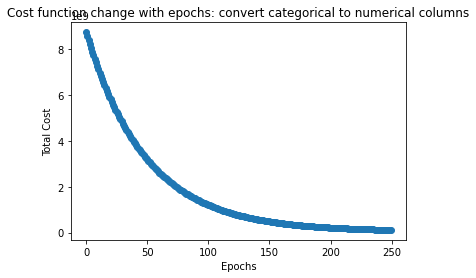

Cost at epoch 0 is: 8755169404.056446
Cost at epoch 25 is: 5319194411.293778
Cost at epoch 50 is: 3253321331.2316866
Cost at epoch 75 is: 2007467973.7357843
Cost at epoch 100 is: 1254725343.4453871
Cost at epoch 125 is: 799367000.066449
Cost at epoch 150 is: 523674446.0274944
Cost at epoch 175 is: 356650252.4115827
Cost at epoch 200 is: 255402237.7541613
Cost at epoch 225 is: 193990108.880682
w = [  9712.86621083   7412.75300792   8503.64771291 -12285.80498169], b = 120389.44268996458


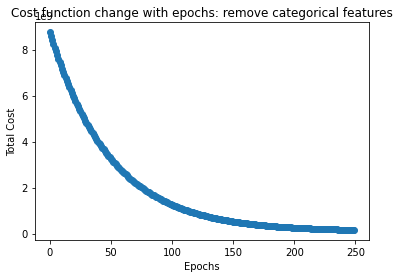

In [27]:
q1 = LinearRegression(df1)

# x, y = q1.datacleaning()
lr = 0.01
epochs = 250
w, b, cost_list= q1.train(x, y, np.zeros(x.shape[1]), 0, learningrate=lr,epochs=epochs)
# Plot cost function result and the change
# This step is used to determine the best epochs and the proper linear model
plt.scatter(list(range(epochs)), cost_list)
plt.title("Cost function change with epochs: convert categorical to numerical columns")
plt.xlabel("Epochs")
plt.ylabel("Total Cost")
plt.show()

x2, y2 = q1.datacleaning2()
lr2 = 0.01
epochs2 = 250
w2, b2, cost_list2= q1.train(x2, y2, np.zeros(x2.shape[1]), 0, learningrate=lr2,epochs=epochs2)
# Plot cost function result and the change
# This step is used to determine the best epochs and the proper linear model
plt.scatter(list(range(epochs2)), cost_list2)
plt.title("Cost function change with epochs: remove categorical features")
plt.xlabel("Epochs")
plt.ylabel("Total Cost")
plt.show()

#### Loss Function on Training Dataset
The loss function result indicates large numbers (>e8). This could happen because of the large values of home price.

In [400]:
# Check the loss on trained dataset
y_pred = q1.predict(x, w, b)
y_pred2 = q1.predict(x2, w2, b2)
cost = (y-y_pred)**2
cost2 = (y-y_pred2)**2
prediction = pd.DataFrame({"Y": y, "Y_predict": y_pred,"cost":cost,
                           "Y_predict2": y_pred2,"cost2":cost2})
prediction.head()

,Y,Y_predict,cost,Y_predict2,cost2
0,114300,86831.305723,754529165.304193,99571.850183,2.169184e+08
1,114200,106339.454509,61788175.409146,119877.690666,3.223617e+07
2,114800,103198.933487,134584744.228112,119147.134600,1.889758e+07
3,94700,94896.279184,38525.518046,107193.684979,1.560922e+08
4,119800,111470.29213,69384033.19687,131273.317223,1.316370e+08


Below are the prediction and loss function visualization. 
Both prediction could give a rough prediction on the price while result in high loss function when the real prices are extremely high.
Overall, the first data cleaning method will be more accurate, in which categorical features were converted to numerical ones and was trained.

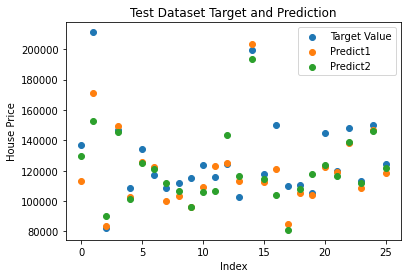

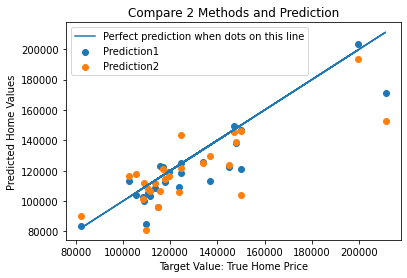

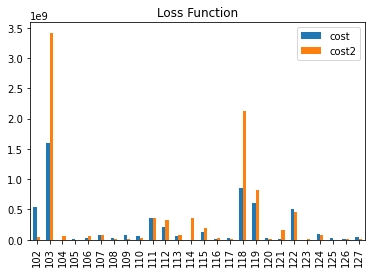

In [401]:
# (c)(d)
# Check the prediction for test dataset
q2 = LinearRegression(df2)
# x_test, y_test = q2.datacleaning()
x_test2, y_test2 = q2.datacleaning2()

y_pred_test = q1.predict(x_test, w, b)
y_pred2_test = q1.predict(x_test2, w2, b2)

cost_test = (y_test-y_pred_test)**2
cost2_test = (y_test2-y_pred2_test)**2
prediction = pd.DataFrame({"Y": y_test, "Y_predict": y_pred_test,"cost":cost_test,
                           "Y_predict2": y_pred2_test,"cost2":cost2_test})

x_range = range(len(y_test))
plt.scatter(x_range, y_test, label='Target Value')
plt.scatter(x_range, y_pred_test, label='Predict1')
plt.scatter(x_range, y_pred2_test, label='Predict2')
plt.legend(loc="upper right")
plt.title('Test Dataset Target and Prediction')
plt.ylabel('House Price')
plt.xlabel('Index')
plt.show()

plt.scatter(prediction['Y'], prediction['Y_predict'], label='Prediction1')
plt.scatter(prediction['Y'], prediction['Y_predict2'], label='Prediction2')
plt.plot(prediction['Y'], prediction['Y'], label='Perfect prediction when dots on this line')
plt.legend(loc="upper left")
plt.title('Compare 2 Methods and Prediction')
plt.xlabel('Target Value: True Home Price')
plt.ylabel('Predicted Home Values')
plt.show()

ax = prediction.plot(y=['cost','cost2'], kind="bar")
plt.title('Loss Function')
plt.show()

RMSE and R2 Score also indicate that method 1 (including categorical features) will give a better prediction on home prices.

In [402]:
# (e) RMSE R2
rmse1 = np.sqrt(sum(cost_test)/len(cost_test))
rmse2 = np.sqrt(sum(cost2_test)/len(cost2_test))

r2_1 = 1-sum(cost_test)/sum((y_test-sum(y_test)/len(y_test))**2)
r2_2 = 1-sum(cost2_test)/sum((y_test2-sum(y_test2)/len(y_test2))**2)

rmse_r2_summary = pd.DataFrame({'Method':['1','2'],
                                'RMSE':[rmse1,rmse2],
                                'R2 score':[r2_1,r2_2]})
rmse_r2_summary                

,Method,RMSE,R2 score
0,1,14368.691285,0.730692
1,2,18370.297220,0.559804


### Problem (2) 
Perform model selection using subset best, forward selection, and backward selection methods (15 points)

a) Show your best model features

c) Compare your model performance against the model Q1

#### Subset


In [403]:
#(a) Subset
def processSubset(x,y,feature_set,learningrate,epochs):
    # Select features
    x = x[list(feature_set)]
    w, b, cost_list= q1.train(x, y, np.zeros(x.shape[1]), 0, learningrate=learningrate,epochs=epochs)
    # regr = model.train()
    predict = q1.predict(x=x, w=w, b=b)
    rss = ((predict-y)**2).sum()
    return {"w":w,"b":b, "RSS":rss}

def getBest(k,x,y,epo):
    results = [] 
    combo_list = []
    for combo in itertools.combinations(x.columns, k):
        results.append(processSubset(x=x,y=y,feature_set=combo,learningrate=0.01,epochs=epo))
        combo_list.append(combo)
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    models['Combo'] = combo_list
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    #print("Processed", models.shape[0], "models on", k)
    # Return the best model, along with some other useful information about the model
    return best_model

In [404]:
models_best = pd.DataFrame(columns=["w", "b","RSS","Combo"])
for i in range(1,7):
    models_best.loc[i] = getBest(i,x,y,epo=250)

Cost at epoch 0 is: 8761136750.131834
Cost at epoch 25 is: 5421194725.84237
Cost at epoch 50 is: 3393096536.39613
Cost at epoch 75 is: 2160846721.2590165
Cost at epoch 100 is: 1411705499.4559102
Cost at epoch 125 is: 956005552.9479219
Cost at epoch 150 is: 678648242.486068
Cost at epoch 175 is: 509744042.13994384
Cost at epoch 200 is: 406829638.9852461
Cost at epoch 225 is: 344090103.21363187
w = [11928.45985812], b = 120826.0504350959
Cost at epoch 0 is: 8759236155.149208
Cost at epoch 25 is: 5391437938.511452
Cost at epoch 50 is: 3358717367.66901
Cost at epoch 75 is: 2131714238.131132
Cost at epoch 100 is: 1390999980.2969277
Cost at epoch 125 is: 943808555.3306055
Cost at epoch 150 is: 673801788.6969724
Cost at epoch 175 is: 510761497.6627775
Cost at epoch 200 is: 412302581.9649072
Cost at epoch 225 is: 352838369.186363
w = [12945.21590434], b = 120164.55823546424
Cost at epoch 0 is: 8761172080.88348
Cost at epoch 25 is: 5422184624.5053625
Cost at epoch 50 is: 3394939718.8147507
Cost

The following indicates the minimum RSS under different numbers of selected features.
The lowest RSS at 1 selected feature is at SqFt selected only. The lowest RSS at 3 selected features are (SqFt, Bathrooms, Neighborhood).
For the best prediction comparison, we will chose all 5 features.

In [405]:
models_best

,w,b,RSS,Combo
1,[11928.459858119824],120826.050435,6.263166e+10,"(SqFt,)"
2,"[14811.254733755097, -11715.31909957006]",120758.921239,4.395848e+10,"(SqFt, Offers)"
3,"[14186.244614472718, -10879.274423883477, 8195...",120940.431726,3.618978e+10,"(SqFt, Offers, Brick)"
4,"[12779.15686834943, -8572.589326016034, 8271.7...",120216.556538,2.817220e+10,"(SqFt, Offers, Brick, Neighborhood)"
5,"[10332.643764046223, 6562.032104624102, -9031....",120385.343974,2.519630e+10,"(SqFt, Bathrooms, Offers, Brick, Neighborhood)"
6,"[8146.589542618942, 6877.038676060012, 5522.25...",120221.984026,2.339032e+10,"(SqFt, Bedrooms, Bathrooms, Offers, Brick, Nei..."


In [406]:
# This is the most important feature orders from the sublet selection process.
features_order = ['SqFt','Bathrooms','Neighborhood','Brick','Bedrooms','Offers']
# = models_best['Combo'].loc[6]

In [407]:
y_pred_subset = q2.predict(x_test[list(models_best.loc[5]['Combo'])], 
                           models_best.loc[5]['w'], models_best.loc[5]['b'])
cost_subset = (y_test-y_pred_subset)**2
prediction_sublet = pd.DataFrame({"Y": y_test, "Y_predict": y_pred_test,"cost":cost_test,
                           "Y_predict_sublet": y_pred_subset,"cost_sublet":cost_subset})
prediction_sublet.head()   

,Y,Y_predict,cost,Y_predict_sublet,cost_sublet
102,136800,113503.967279,542705140.537229,117776.298111,361901233.559432
103,211200,171203.710227,1599703195.64447,169792.26993,1714600109.555802
104,82300,83400.2618,1210576.028931,80457.158088,3396066.313657
105,146900,149475.429464,6632836.922665,149992.711631,9564865.2312
106,108500,102815.81414,32309968.8924,104410.049438,16727695.596874


In [408]:
rmse1 = np.sqrt(sum(cost_test)/len(cost_test))
rmse_subset = np.sqrt(sum(cost_subset)/len(cost_subset))
r2_1 = 1-sum(cost_test)/sum((y_test-sum(y_test)/len(y_test))**2)
r2_subset = 1-sum(cost_subset)/sum((y_test2-sum(y_test2)/len(y_test2))**2)

rmse_r2_subsetsummary = pd.DataFrame({'Method':['1','Sublet'],
                                      'RMSE':[rmse1,rmse_subset],
                                      'R2 score':[r2_1,r2_subset]})
rmse_r2_subsetsummary   

,Method,RMSE,R2 score
0,1,14368.691285,0.730692
1,Sublet,13645.029019,0.757136


Above cost prediction looks alike and has small differences between feature selection. Select 5 features will give a lower RMSE and higher R2 score. This indicated that 5 features could result in more linear prediction.

#### Forward Stepwise Selection

In [409]:
def forward(x,y,predictors, lr, epo):
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in x.columns if p not in predictors]
    results = []
    combo_list = []

    for p in remaining_predictors:
        results.append(processSubset(x,y,predictors+[p], learningrate=lr, epochs=epo))
        combo_list.append(predictors+[p])
    
    # # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    models['Predictors'] = combo_list

    # # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [410]:
models_fwd = pd.DataFrame(columns=["w", "b","RSS","Predictors"])
predictors = []

for i in range(1,len(features_order)):  
    predictors = features_order[0:i]  
    models_fwd.loc[i] = forward(x,y,predictors,lr=0.01,epo=250)

models_fwd

Cost at epoch 0 is: 8758600524.570488
Cost at epoch 25 is: 5378776895.781655
Cost at epoch 50 is: 3338607460.354859
Cost at epoch 75 is: 2106428860.684278
Cost at epoch 100 is: 1361815856.7116008
Cost at epoch 125 is: 911554444.2742157
Cost at epoch 150 is: 639084625.94289
Cost at epoch 175 is: 474059173.5331721
Cost at epoch 200 is: 374003584.599946
Cost at epoch 225 is: 313261172.00492615
w = [ 8049.16892858 10143.42408451], b = 120506.08646181732
Cost at epoch 0 is: 8760533798.683783
Cost at epoch 25 is: 5407475144.988887
Cost at epoch 50 is: 3370288787.4281693
Cost at epoch 75 is: 2132425911.1394246
Cost at epoch 100 is: 1380188749.2503579
Cost at epoch 125 is: 923028473.3653204
Cost at epoch 150 is: 645180821.5321144
Cost at epoch 175 is: 476306255.0349625
Cost at epoch 200 is: 373661430.70438087
Cost at epoch 225 is: 311270393.54943526
w = [8631.47119617 8560.0082737 ], b = 121022.27196773929
Cost at epoch 0 is: 8759952920.491697
Cost at epoch 25 is: 5396268456.472425
Cost at epo

,w,b,RSS,Predictors
1,"[14811.254733755097, -11715.31909957006]",120758.921239,4.395848e+10,"[SqFt, Offers]"
2,"[11387.10079754919, 9166.608399076122, -12115....",120966.939696,3.700432e+10,"[SqFt, Bathrooms, Offers]"
3,"[10572.147581459412, 7656.125778137005, 10525....",120246.371283,3.138495e+10,"[SqFt, Bathrooms, Neighborhood, Offers]"
4,"[10332.643764046225, 6562.032104624102, 10648....",120385.343974,2.519630e+10,"[SqFt, Bathrooms, Neighborhood, Brick, Offers]"
5,"[8146.589542618942, 5522.250312842757, 8824.25...",120221.984026,2.339032e+10,"[SqFt, Bathrooms, Neighborhood, Brick, Bedroom..."


As RSS drops slower when predictors include 6 features, we choose model with 5 predictors for prediction. Following part indicate that the 5 features select from forward stepwise selection 

In [411]:
y_pred_fwd = q2.predict(x_test[list(models_fwd.loc[4]['Predictors'])], 
                            models_fwd.loc[4]['w'], models_fwd.loc[4]['b'])
cost_fwd = (y_test-y_pred_fwd)**2
prediction_fwd = pd.DataFrame({"Y": y_test, "Y_predict": y_pred_test,"cost":cost_test,
                               "Y_predict_fwd": y_pred_fwd,"cost_fwd":cost_fwd})
prediction_fwd.head()


,Y,Y_predict,cost,Y_predict_fwd,cost_fwd
102,136800,113503.967279,542705140.537229,117776.298111,361901233.559432
103,211200,171203.710227,1599703195.64447,169792.26993,1714600109.555802
104,82300,83400.2618,1210576.028931,80457.158088,3396066.313657
105,146900,149475.429464,6632836.922665,149992.711631,9564865.2312
106,108500,102815.81414,32309968.8924,104410.049438,16727695.596874


#### Backward Stepwise Selection

In [413]:
def backward(x,y,predictors,lr,epo):
    results = []
    combo_list = []

    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,combo,learningrate=lr, epochs=epo))
        combo_list.append(combo)
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    models['Predictors'] = combo_list
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    # Return the best model, along with some other useful information about the model
    return best_model

In [414]:
models_bwd = pd.DataFrame(columns=["w", "b","RSS","Predictors"], index = range(1,len(x.columns)))
features_order = ['SqFt','Bathrooms','Neighborhood','Brick','Bedrooms','Offers']

while(len(features_order) > 0):  
    models_bwd.loc[len(features_order)] = backward(x,y,features_order,lr=0.01,epo=250)
    features_order.pop()

models_bwd

Cost at epoch 0 is: 8752526670.080688
Cost at epoch 25 is: 5286138017.878683
Cost at epoch 50 is: 3223938465.0899534
Cost at epoch 75 is: 1989816014.2377822
Cost at epoch 100 is: 1247801394.2512445
Cost at epoch 125 is: 799944053.3570989
Cost at epoch 150 is: 528730589.285688
Cost at epoch 175 is: 363998450.567561
Cost at epoch 200 is: 263665441.46895528
Cost at epoch 225 is: 202395831.37989384
w = [5999.047526684569 4861.272500538177 10532.95939139829 8725.430609992618
 6401.781315801499], b = 120212.61470031159
Cost at epoch 0 is: 8753867580.195591
Cost at epoch 25 is: 5296170360.470389
Cost at epoch 50 is: 3223233283.472786
Cost at epoch 75 is: 1976714344.597862
Cost at epoch 100 is: 1224911234.8414645
Cost at epoch 125 is: 770135088.6965314
Cost at epoch 150 is: 494208042.26798445
Cost at epoch 175 is: 326277462.1713184
Cost at epoch 200 is: 223744380.1211011
Cost at epoch 225 is: 160926429.1904788
w = [10332.643764046225 6562.032104624102 10648.172505798531 7387.311566122218
 -903

,w,b,RSS,Predictors
1,[],120389.442690,8.308571e+10,()
2,[11928.459858119824],120826.050435,6.263166e+10,"(SqFt,)"
3,"[10961.12123770002, 12850.657144418808]",120018.575242,4.847490e+10,"(SqFt, Neighborhood)"
4,"[10468.422400652737, 12764.701304449476, 9140....",120215.447624,3.760248e+10,"(SqFt, Neighborhood, Brick)"
5,"[8147.183482144053, 5862.5067389959195, 12194....",120367.946281,3.528263e+10,"(SqFt, Bathrooms, Neighborhood, Brick)"
6,"[10332.643764046225, 6562.032104624102, 10648....",120385.343974,2.519630e+10,"(SqFt, Bathrooms, Neighborhood, Brick, Offers)"


When we chose model with 5 predictors, it will lead to lower RMSE and higher R2 score, which indicate better fitting result compared to Q1.

In [415]:
y_pred_bwd = q2.predict(x_test[list(models_bwd.loc[6]['Predictors'])], 
                           models_bwd.loc[6]['w'], models_bwd.loc[6]['b'])
cost_bwd = (y_test-y_pred_bwd)**2
prediction_bwd = pd.DataFrame({"Y": y_test, "Y_predict": y_pred_test,"cost":cost_test,
                           "Y_predict_bwd": y_pred_bwd,"cost_bwd":cost_bwd})
prediction_bwd.head()

rmse1 = np.sqrt(sum(cost_test)/len(cost_test))
rmse_bwd = np.sqrt(sum(cost_bwd)/len(cost_bwd))
r2_1 = 1-sum(cost_test)/sum((y_test-sum(y_test)/len(y_test))**2)
r2_bwd = 1-sum(cost_bwd)/sum((y_test2-sum(y_test2)/len(y_test2))**2)

rmse_r2_bwdsummary = pd.DataFrame({'Method':['1','Backward'],
                                   'RMSE':[rmse1,rmse_bwd],
                                   'R2 score':[r2_1,r2_bwd]})
rmse_r2_bwdsummary 

,Method,RMSE,R2 score
0,1,14368.691285,0.730692
1,Backward,13645.029019,0.757136


Extra Credit Question: 5 Points

a) Implement Ridge/Lasso regression for the dataset

b) Compare the lasso/ridge regression model output with Q1, and Q3 models performance metrics

Note: RMSE and R2 performance metrics are sufficient for comparison

In [7]:
class RidgeOrLasso():
    def __init__(self, x, y, regularization, lr, epoch, alpha):
        self.x = x
        self.y = y
        self.w = np.zeros((self.x.shape[1],1)) 
        self.b = 0
        self.regularization = regularization # Choose whatever regularization you like
        self.lr = lr 
        self.epoch = epoch 
        self.alpha = alpha
    
    def cost(self):
        loss = 0
        n = len(self.y)
        for i in range(n):
            loss += (self.y[i]-(np.dot(self.x.iloc[i],self.w)+self.b))**2
        return loss/2/float(n)
    
    def predict(self):
        y_pred = np.dot(self.x,self.w)+self.b
        return y_pred
    
    def gradient_descend(self):
        z = self.x.dot(self.w) + self.b
        loss = np.array([z.loc[i]-self.y[i] for i in range(len(self.y))] )
        reg = self.regularization(alpha=self.alpha)
        weight_gradient = self.x.T.dot(loss) / len(self.y)+reg.derivation(self.w)
        bias_gradient = np.sum(loss) / len(self.y)
        self.w = np.array(self.w - self.lr*weight_gradient)
        self.b = self.b - self.lr*bias_gradient
        return self.w, self.b

    def train(self):
        """
        w: input slope trial starting point
        b: input intersect trial starting point
        learning rate: suggested from 0.001 to 0.05
        epochs: suggested larger than 100
        """
        cost_list = [0] * self.epoch
        for epoch in range(self.epoch):
            self.w, self.b = self.gradient_descend()
            cost = self.cost()
            cost_list[epoch] = cost
            if (epoch%(self.epoch/5)==0):
                print("Cost at epoch",epoch,"is:",cost)
        print(f"w = {w}, b = {b}")
        return self.w, self.b, cost_list
    
    def test(self):
        cost_list = [0] * self.epoch
        for epoch in range(self.epoch):
            z = self.x.dot(self.w) + self.b
            loss = np.array([z.loc[i]-self.y[i] for i in range(len(self.y))] )
            weight_gradient = self.x.T.dot(loss) / len(self.y)
            bias_gradient = np.sum(loss) / len(self.y)


class RidgePenalty: 
    """   
    This class defines ridge regression penalty, which make it different than lasso. 
    """
    def __init__(self, alpha):
        self.a = alpha
    def cost(self, w):
        return self.a*np.sum(np.square(w))
    def derivation(self, w):
        return 2*self.a*w


class LassoPenalty:
    """
    This class defines lasso regression penalty.
    """
    def __init__(self, alpha):
        self.a = alpha
    def cost(self,w):
        return self.a*np.sum(np.abs(w))
    def derivation(self, w):
        return self.a*np.sign(w)


ridge = RidgeOrLasso(x,y,regularization=RidgePenalty,lr=0.01, epoch=250,alpha=0.11)
lasso = RidgeOrLasso(x,y,regularization=LassoPenalty,lr=0.01, epoch=250,alpha=0.11)
w_ridge, b_ridge, cost_ridge = ridge.train()
w_lasso, b_lasso, cost_lasso = lasso.train()

NameError: name 'x' is not defined

In [441]:
y_pred_ridge = np.dot(x_test,w_ridge)+b_ridge
y_pred_ridge = np.reshape(y_pred_ridge,(1, len(y_pred_ridge)))[0]
y_pred_lasso = np.dot(x_test,w_lasso)+b_lasso
y_pred_lasso = np.reshape(y_pred_lasso,(1, len(y_pred_lasso)))[0]
cost_ridge = (y_test-y_pred_ridge)**2
cost_lasso = (y_test-y_pred_lasso)**2

prediction_eq = pd.DataFrame({"Y": y_test, "Y_predict": y_pred_test,"cost":cost_test,
                            "Y_ridge":y_pred_ridge, "cost_ridge":cost_ridge,
                            "Y_lasso":y_pred_lasso, "cost_lasso":cost_lasso})
prediction_eq.head()

,Y,Y_predict,cost,Y_ridge,cost_ridge,Y_lasso,cost_lasso
102,136800,113503.967279,542705140.537229,115256.005091,464143716.644309,113504.035671,542701954.009234
103,211200,171203.710227,1599703195.64447,165694.37548,2070761862.941278,171203.28346,1599737333.981349
104,82300,83400.2618,1210576.028931,88027.526733,32804562.482307,83400.613934,1211351.031432
105,146900,149475.429464,6632836.922665,146950.252272,2525.290845,149475.248055,6631902.54497
106,108500,102815.81414,32309968.8924,105090.915793,11621855.130898,102816.023249,32307591.703694


The following graphs indicate that ridge and lasso do not have huge difference on prediction. In most cases, ridge and lasso can give smaller cost. This is because both methods used regularization to limit the extreme weight in the prediction models. 

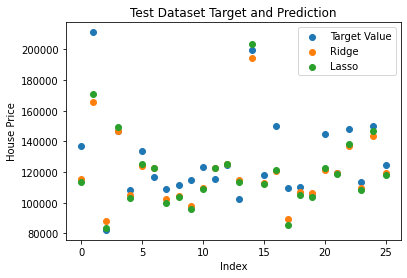

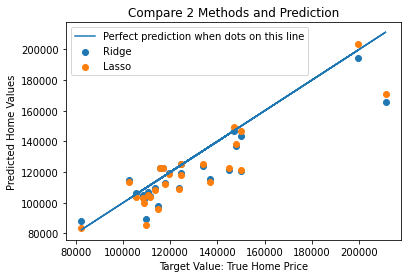

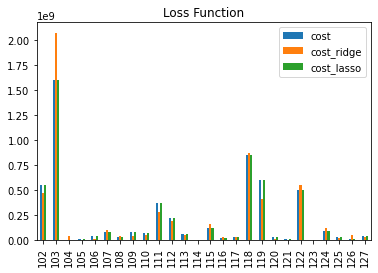

In [442]:
x_range = range(len(y_test))
plt.scatter(x_range, y_test, label='Target Value')
plt.scatter(x_range, y_pred_ridge, label='Ridge')
plt.scatter(x_range, y_pred_lasso, label='Lasso')
plt.legend(loc="upper right")
plt.title('Test Dataset Target and Prediction')
plt.ylabel('House Price')
plt.xlabel('Index')
plt.show()

plt.scatter(prediction_eq['Y'], prediction_eq['Y_ridge'], label='Ridge')
plt.scatter(prediction_eq['Y'], prediction_eq['Y_lasso'], label='Lasso')
plt.plot(prediction_eq['Y'], prediction_eq['Y'], label='Perfect prediction when dots on this line')
plt.legend(loc="upper left")
plt.title('Compare 2 Methods and Prediction')
plt.xlabel('Target Value: True Home Price')
plt.ylabel('Predicted Home Values')
plt.show()

ax = prediction_eq.plot(y=['cost','cost_ridge','cost_lasso'], kind="bar")
plt.title('Loss Function')
plt.show()

RMSE values and R2 scores indicate that ridge and lasso did not give a linear result as well as Q1, especially for ridge. Later we can adjust alpha (or lambda) to see if better models exist.

In [443]:
rmse1 = np.sqrt(sum(cost_test)/len(cost_test))
rmse_ridge = np.sqrt(sum(cost_ridge)/len(cost_ridge))
rmse_lasso = np.sqrt(sum(cost_lasso)/len(cost_lasso))

r2_1 = 1-sum(cost_test)/sum((y_test-sum(y_test)/len(y_test))**2)
r2_ridge = 1-sum(cost_ridge)/sum((y_test-sum(y_test)/len(y_test))**2)
r2_lasso = 1-sum(cost_lasso)/sum((y_test-sum(y_test)/len(y_test))**2)

rmse_r2_eq = pd.DataFrame({'Method':['1','Ridge','Lasso'],
                            'RMSE':[rmse1,rmse_ridge,rmse_lasso],
                           'R2 score':[r2_1,r2_ridge,r2_lasso]})
rmse_r2_eq

,Method,RMSE,R2 score
0,1,14368.691285,0.730692
1,Ridge,14630.494753,0.720789
2,Lasso,14368.692218,0.730692
